In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv("C:/Users/SAI SAATHWIK DUSSA/Downloads/heart-disease.csv")

# Cleaned Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# DATA VISUALIZATION
# Draw a heatmap to find out co-releation

<AxesSubplot:>

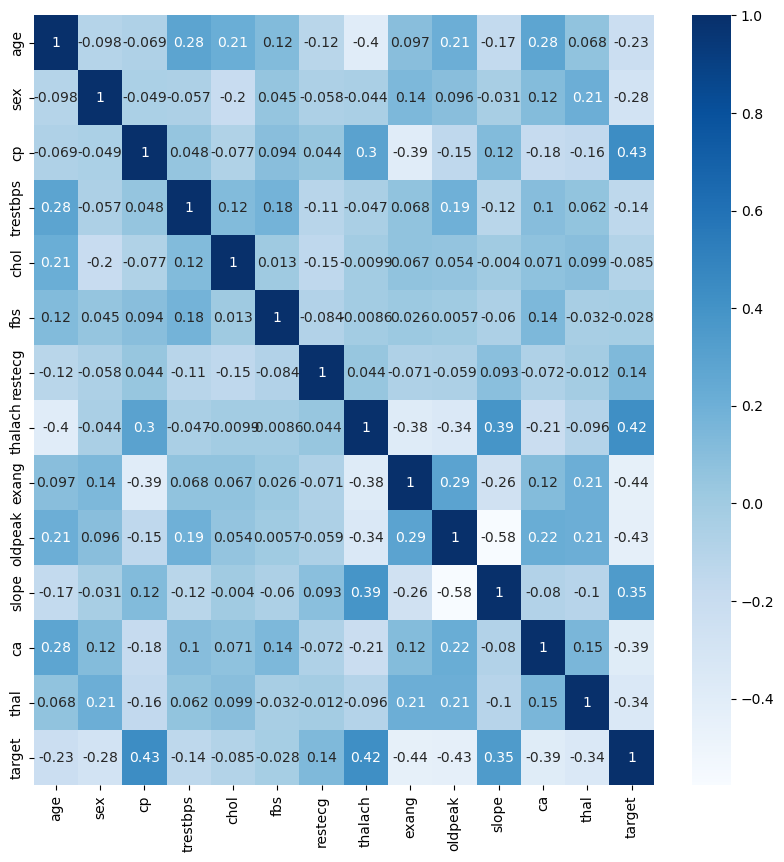

In [4]:
df.corr()
plt.figure(figsize=(10,10), dpi =100)
sns.heatmap(df.corr(),annot =True, cmap="Blues")

In [5]:
#Split x and y

In [6]:
x=df.drop("target",axis=1)
y=df["target"].values

# FEATURE ENGINEERING

# Feature Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
#Train Test split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227, 13), (76, 13), (227,), (76,))

# MODEL BUILDING

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# MODEL PREDICTION

In [12]:
y_pred=model.predict(x_test)

In [13]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [14]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

# MODEL EVALUATION

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
cm=confusion_matrix(y_test,y_pred)


In [17]:
cm

array([[21,  8],
       [ 5, 42]], dtype=int64)

In [18]:
acscore=accuracy_score(y_test,y_pred)

In [19]:
acscore

0.8289473684210527

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.84      0.89      0.87        47

    accuracy                           0.83        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.83      0.83      0.83        76



In [21]:
model.score(x_test,y_test)

0.8289473684210527

# Hence we got a model which runs with 83% Accuracy.